# Regression of Bike Loans
This project deals with the prediction of bike loans based on different numerical, continuous variables by applying different regression models. The project includes the following steps:
- EDA
- definition of categorical and numerical variables + scaling
- testing of different regression models + model optimization
- Feature importance analysis
- saving the model

Fanaee-T, H. (2013). Bike Sharing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5W894.

Code was optimized and generated with ChatGPT.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [17]:
df = pd.read_csv(r'C:\Users\Sabrina\OneDrive\Desktop\David_work\Python\day.csv', delimiter = ",")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [21]:
print("Missing values in dataset:\n", df.isnull().sum())


Missing values in dataset:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [47]:
#drop the date column
df2 = df.drop(columns='dteday')

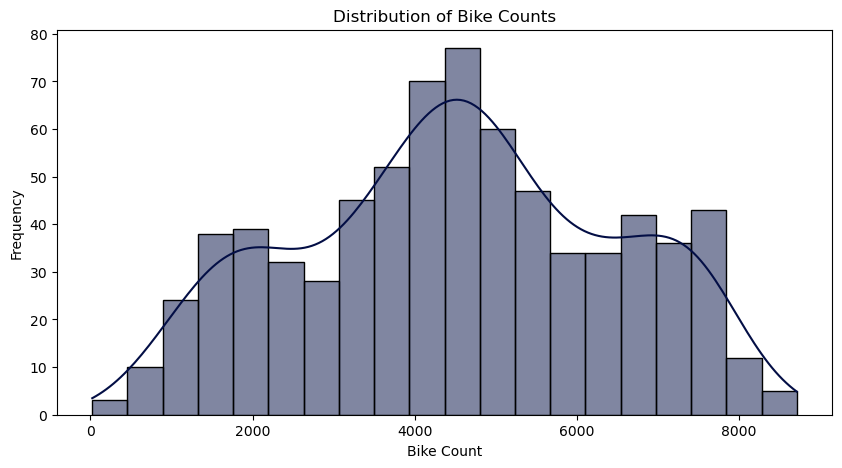

In [49]:
# count is the target variable for prediction
plt.figure(figsize=(10,5))
sns.histplot(df2['cnt'], bins=20, kde=True, color='#030e45')
plt.title('Distribution of Bike Counts')
plt.xlabel('Bike Count')
plt.ylabel('Frequency')
plt.show()


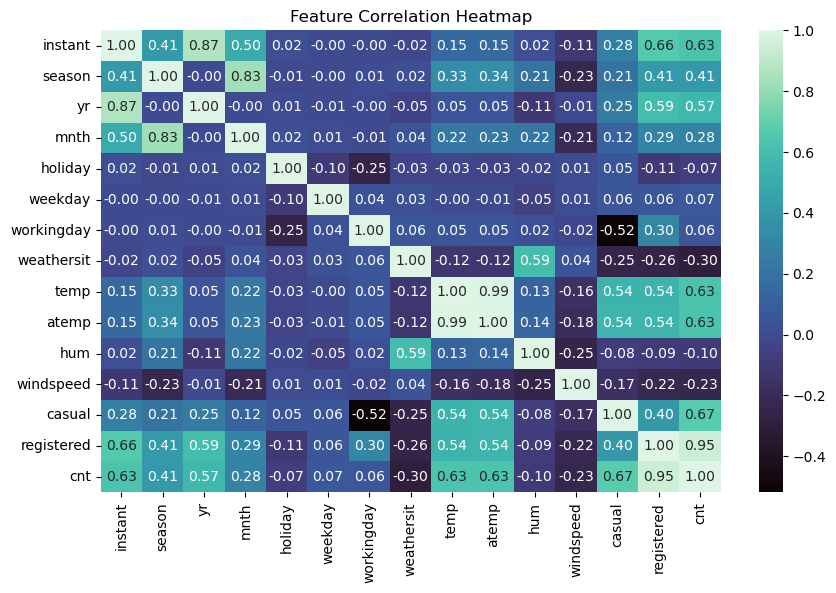

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(), annot=True, cmap='mako', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [57]:
df2 = df2.drop(columns=['instant', 'casual', 'registered'])  # Remove ID, date, and unnecessary columns


In [67]:
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']

# One-Hot Encoding for categorical variables
df2 = pd.get_dummies(df2, columns=categorical_features, drop_first=True)


In [69]:
X = df2.drop(columns=['cnt'])
y = df2['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [73]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Performance:\n MAE: {mae:.2f}\n MSE: {mse:.2f}\n R2 Score: {r2:.4f}")


Linear Regression Performance:
 MAE: 583.02
 MSE: 634351.36
 R2 Score: 0.8418


In [75]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }

# Convert results to DataFrame
results_df2 = pd.DataFrame(results).T
print(results_df2)


                          MAE            MSE  R2 Score
Linear Regression  583.019759  634351.361525  0.841803
Ridge Regression   586.525445  638881.355618  0.840673
Lasso Regression   583.487950  634968.265707  0.841649
Random Forest      468.115306  521135.310456  0.870037
Gradient Boosting  488.641651  462436.938382  0.884676


In [79]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.8, 1.0]
}
# Initialize the model
gb = GradientBoostingRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Display best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

# Train final model with best parameters
best_gb = grid_search.best_estimator_
y_pred_gb = best_gb.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f"Final Gradient Boosting Model Performance:\n"
      f"MAE: {mean_absolute_error(y_test, y_pred_gb):.2f}\n"
      f"MSE: {mean_squared_error(y_test, y_pred_gb):.2f}\n"
      f"R2 Score: {r2_score(y_test, y_pred_gb):.4f}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Best R2 Score: 0.8673642597338596
Final Gradient Boosting Model Performance:
MAE: 493.64
MSE: 492791.22
R2 Score: 0.8771


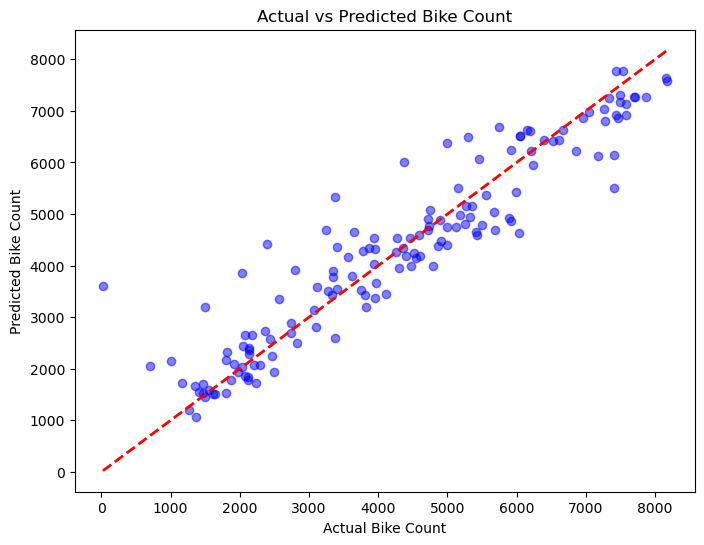

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_gb, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Bike Count")
plt.ylabel("Predicted Bike Count")
plt.title("Actual vs Predicted Bike Count")
plt.show()


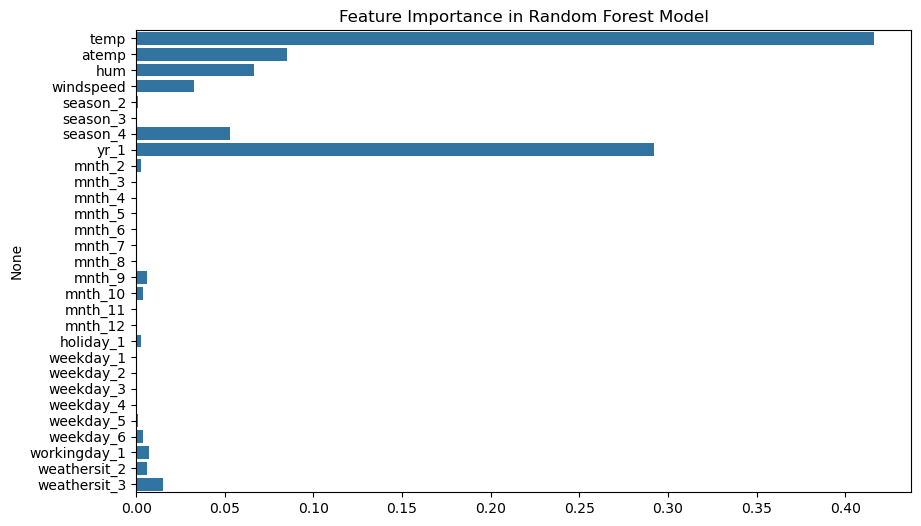

In [83]:
importances = best_gb.feature_importances_
feature_names = X_train.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [85]:
#Repeat with Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

# Train final model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate
print(f"Final Random Forest Model Performance:\n R2 Score: {r2_score(y_test, y_pred_rf):.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best R2 Score: 0.8437231716862165
Final Random Forest Model Performance:
 R2 Score: 0.8699


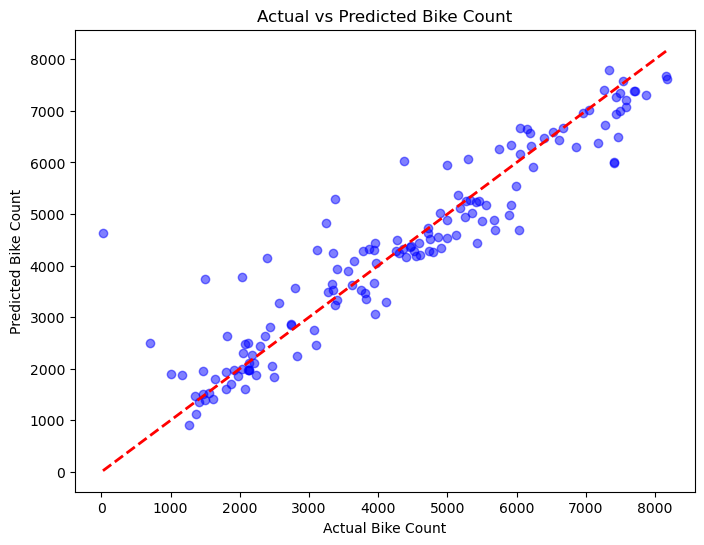

In [87]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Bike Count")
plt.ylabel("Predicted Bike Count")
plt.title("Actual vs Predicted Bike Count")
plt.show()


In [89]:
# Install XGBoost if not installed
!pip install xgboost

# Import libraries
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/124.9 MB 6.7 MB/s eta 0:00:19
    --------------------------------------- 2.6/124.9 MB 6.9 MB/s eta 0:00:18
   - -------------------------------------- 3.7/124.9 MB 6.2 MB/s eta 0:00:20
   - -------------------------------------- 4.2/124.9 MB 5.2 MB/s eta 0:00:24
   - -------------------------------------- 4.7/124.9 MB 4.6 MB/s eta 0:00:27
   - -------------------------------------- 5.5/124.9 MB 4.4 MB/s eta 0:00:28
   - -------------------------------------- 6.0/124.9 MB 4.1 MB/s eta 0:00:29
   -- ------------------------------------- 6.6/124.9 MB 4.1 MB/s eta 0:00:29
   -- ------------------------------------- 8.1/124.9 MB 4.2 MB/s eta 0:00:28
   --- ------------------------------------ 9.4/124.9 MB 4.4 MB/s eta 0:00:26
   --- ------------------------------------ 11.0/124.9 MB 4.7 MB/s eta 0:00:25
   --- ------------------------------------ 12.3/124.9 MB 4.9 MB/s eta

In [90]:
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Model
print(f"XGBoost Model Performance:\n"
      f"MAE: {mean_absolute_error(y_test, y_pred_xgb):.2f}\n"
      f"MSE: {mean_squared_error(y_test, y_pred_xgb):.2f}\n"
      f"R2 Score: {r2_score(y_test, y_pred_xgb):.4f}")


XGBoost Model Performance:
MAE: 464.33
MSE: 449940.49
R2 Score: 0.8878


In [93]:
# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [ 0.8, 0.9, 1.0]
}

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score:", random_search.best_score_)

# Train final XGBoost model with best parameters
best_xgb = random_search.best_estimator_
y_pred_xgb_best = best_xgb.predict(X_test)

# Evaluate
print(f"Optimized XGBoost Performance:\n"
      f"MAE: {mean_absolute_error(y_test, y_pred_xgb_best):.2f}\n"
      f"MSE: {mean_squared_error(y_test, y_pred_xgb_best):.2f}\n"
      f"R2 Score: {r2_score(y_test, y_pred_xgb_best):.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best R2 Score: 0.8648974061012268
Optimized XGBoost Performance:
MAE: 488.06
MSE: 476463.39
R2 Score: 0.8812


# Try stacked model

In [98]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

# Define base models
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=200, learning_rate=0.1)
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# Define Stacking Regressor with Linear Regression as the final meta-model
stacked_model = StackingRegressor(
    estimators=[('xgb', xgb_model), ('rf', rf_model)],
    final_estimator=LinearRegression(),
    cv=5
)


In [100]:
# Define base models
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=200, learning_rate=0.1)
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# Define Stacking Regressor with Linear Regression as the final meta-model
stacked_model = StackingRegressor(
    estimators=[('xgb', xgb_model), ('rf', rf_model)],
    final_estimator=LinearRegression(),
    cv=5
)


In [102]:
# Fit Stacking Model
stacked_model.fit(X_train, y_train)


StackingRegressor(cv=5,
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learni...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('rf',
                               RandomForestRegressor(n_estimators=200,
                                                     random_state=42))],
                  final_estimator=LinearRegression())

In [103]:
# Predict on test data
y_pred_stacked = stacked_model.predict(X_test)

# Evaluate performance
print(f"Stacked Model Performance:\n"
      f"MAE: {mean_absolute_error(y_test, y_pred_stacked):.2f}\n"
      f"MSE: {mean_squared_error(y_test, y_pred_stacked):.2f}\n"
      f"R2 Score: {r2_score(y_test, y_pred_stacked):.4f}")


Stacked Model Performance:
MAE: 463.62
MSE: 495362.86
R2 Score: 0.8765


In [106]:
# Train and predict with XGBoost
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Train and predict with Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate all models
models = {
    "XGBoost": y_pred_xgb,
    "Random Forest": y_pred_rf,
    "Stacked Model": y_pred_stacked
}

for model_name, preds in models.items():
    print(f"{model_name} R2 Score: {r2_score(y_test, preds):.4f}")


XGBoost R2 Score: 0.8754
Random Forest R2 Score: 0.8716
Stacked Model R2 Score: 0.8765


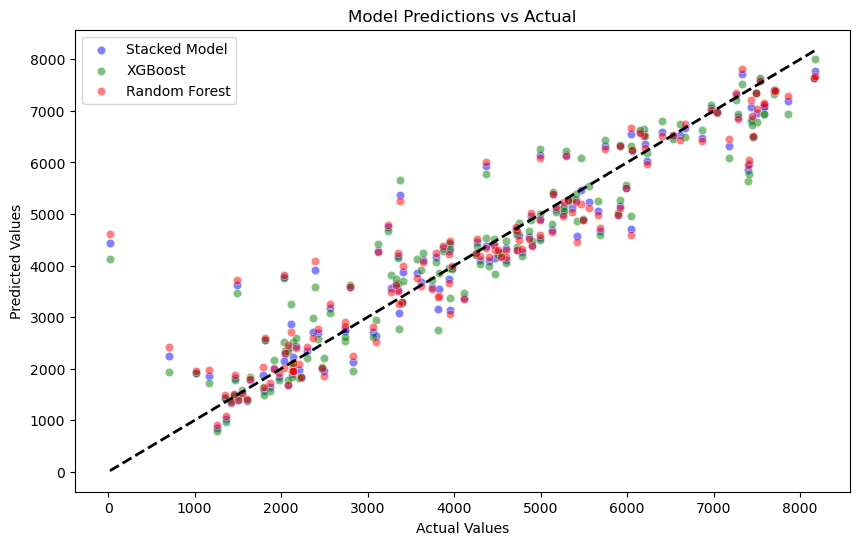

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with actual vs predicted values
results_df = pd.DataFrame({
    "Actual": y_test,
    "XGBoost Predictions": y_pred_xgb,
    "Random Forest Predictions": y_pred_rf,
    "Stacked Model Predictions": y_pred_stacked
})

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_stacked, alpha=0.5, color="blue", label="Stacked Model")
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.5, color="green", label="XGBoost")
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, color="red", label="Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Predictions vs Actual")
plt.legend()
plt.show()


# XGBoost had the best performance

In [113]:
import pickle

# Save the model
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)


In [115]:
import pandas as pd

# Save sample test data (without target column)
X_test.to_csv("X_test_powerbi.csv", index=False)


In [122]:
df2["instant"] = df["instant"].copy()

In [124]:
df2

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,instant
0,0.344167,0.363625,0.805833,0.160446,985,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,1
1,0.363478,0.353739,0.696087,0.248539,801,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,2
2,0.196364,0.189405,0.437273,0.248309,1349,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,3
3,0.200000,0.212122,0.590435,0.160296,1562,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,4
4,0.226957,0.229270,0.436957,0.186900,1600,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.254167,0.226642,0.652917,0.350133,2114,False,False,False,True,False,...,False,False,False,True,False,False,True,True,False,727
727,0.253333,0.255046,0.590000,0.155471,3095,False,False,False,True,False,...,False,False,False,False,True,False,True,True,False,728
728,0.253333,0.242400,0.752917,0.124383,1341,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,729
729,0.255833,0.231700,0.483333,0.350754,1796,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,730


In [127]:
df2.to_csv("dataset_withindex.csv", index=False)
